In [32]:
import pandas as pd
import tensorflow
import numpy as np
import matplotlib.pyplot as plt

dftfxntntfxf

In [33]:
df = pd.read_csv("/content/igl_15012025.csv", parse_dates=["date"])
df = df[['date','open','high','low','close','mcap','volume']]
df_copy = df.copy()
df['date'] = df['date'].apply(lambda date: date.toordinal())
df.sort_values(by="date", inplace=True)
df_copy.sort_values(by="date", inplace=True)
df_copy.tail()

,date,open,high,low,close,mcap,volume
256,2025-01-09,407.60,435.95,407.00,419.50,29365.03,22865384
262,2025-01-10,424.90,432.25,408.65,412.80,28896.03,5582271
263,2025-01-13,408.10,412.95,400.00,406.15,28430.53,3696494
264,2025-01-14,407.90,416.70,406.15,411.25,28787.53,4099788
266,2025-01-15,412.95,415.00,401.30,402.15,28150.53,2452398


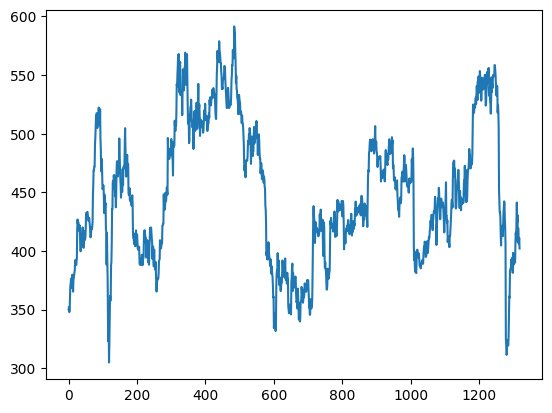

In [34]:
df1 = df.reset_index()['close']
plt.plot(df1)

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

df1= scaler.fit_transform(np.array(df1).reshape(-1,1))
len(df1)

1319

In [36]:
training_size = int(len(df1)*0.8)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]
len(train_data), len(test_data)

(1055, 264)

In [37]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)


time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
len(X_train)+len(X_test)

1217

In [38]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout


In [40]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - loss: 0.1442 - val_loss: 0.0450
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0259 - val_loss: 0.0170
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.0141 - val_loss: 0.0152
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0116 - val_loss: 0.0143
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - loss: 0.0105 - val_loss: 0.0134
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - loss: 0.0097 - val_loss: 0.0130
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0104 - val_loss: 0.0122
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0102 - val_loss: 0.0121
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0103 - val_loss: 0.0119
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0090 - val_loss: 0.0110
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.0091 - val_loss: 0.0106
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - lo

In [41]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


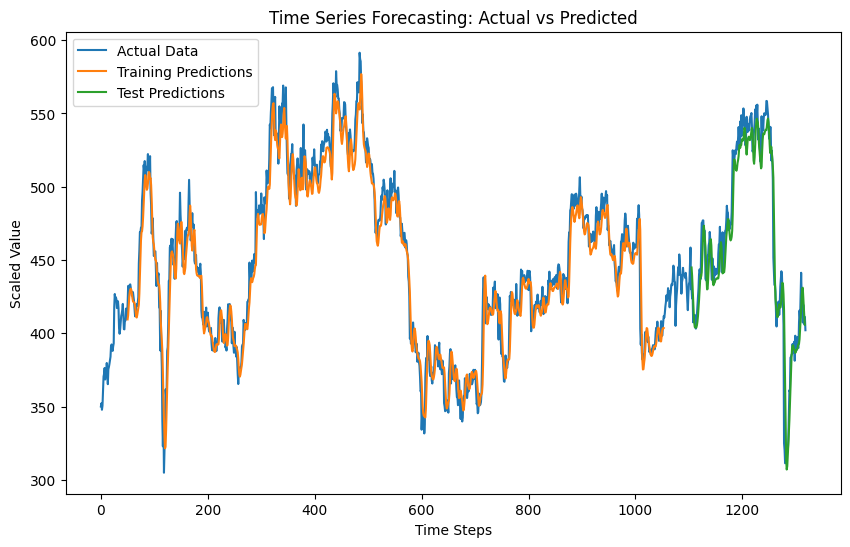

In [42]:
look_back=50
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(df1), label='Actual Data')
plt.plot(trainPredictPlot, label='Training Predictions')
plt.plot(testPredictPlot, label='Test Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Value')
plt.title('Time Series Forecasting: Actual vs Predicted')
plt.legend()
plt.show()

In [43]:
"""x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape
print(X_test.shape), print(ytest.shape)"""

'x_input=test_data[len(test_data)-100:].reshape(1,-1)\nx_input.shape\nprint(X_test.shape), print(ytest.shape)'

In [44]:
"""temp_input=list(x_input)
temp_input=temp_input[0].tolist()"""

'temp_input=list(x_input)\ntemp_input=temp_input[0].tolist()'

In [45]:
"""lst_output=[]
n_steps=100
i=0
while(i<50):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)"""

'lst_output=[]\nn_steps=100\ni=0\nwhile(i<50):\n\n    if(len(temp_input)>100):\n        #print(temp_input)\n        x_input=np.array(temp_input[1:])\n        print("{} day input {}".format(i,x_input))\n        x_input=x_input.reshape(1,-1)\n        x_input = x_input.reshape((1, n_steps, 1))\n        #print(x_input)\n        yhat = model.predict(x_input, verbose=0)\n        print("{} day output {}".format(i,yhat))\n        temp_input.extend(yhat[0].tolist())\n        temp_input=temp_input[1:]\n        #print(temp_input)\n        lst_output.extend(yhat.tolist())\n        i=i+1\n    else:\n        x_input = x_input.reshape((1, n_steps,1))\n        yhat = model.predict(x_input, verbose=0)\n        print(yhat[0])\n        temp_input.extend(yhat[0].tolist())\n        print(len(temp_input))\n        lst_output.extend(yhat.tolist())\n        i=i+1\n\n\nprint(lst_output)'

In [46]:
"""day_new=np.arange(1,101)
day_pred=np.arange(101,151)
index = len(df1) - 100
#plt.plot(day_new,scaler.inverse_transform(df1[index:]))
#plt.plot(day_pred,scaler.inverse_transform(lst_output))
last_actual_x = day_new[-1]

# Adjust day_pred to continue from the last actual x-value
day_pred_adjusted = day_pred - day_pred[0] + last_actual_x + 1

# Combine x-values for the entire range
all_days = np.concatenate([day_new, day_pred_adjusted])

# Combine y-values for actual and predicted data
actual_values = scaler.inverse_transform(df1[index:])
predicted_values = scaler.inverse_transform(lst_output)

# Plot the entire data with different colors for segments
plt.plot(day_new, actual_values, color='blue', label='Actual Data')  # Actual data in blue
plt.plot(day_pred_adjusted, predicted_values, color='orange', label='Predicted Data')  # Predicted data in orange"""


"day_new=np.arange(1,101)\nday_pred=np.arange(101,151)\nindex = len(df1) - 100\n#plt.plot(day_new,scaler.inverse_transform(df1[index:]))\n#plt.plot(day_pred,scaler.inverse_transform(lst_output))\nlast_actual_x = day_new[-1]\n\n# Adjust day_pred to continue from the last actual x-value\nday_pred_adjusted = day_pred - day_pred[0] + last_actual_x + 1\n\n# Combine x-values for the entire range\nall_days = np.concatenate([day_new, day_pred_adjusted])\n\n# Combine y-values for actual and predicted data\nactual_values = scaler.inverse_transform(df1[index:])\npredicted_values = scaler.inverse_transform(lst_output)\n\n# Plot the entire data with different colors for segments\nplt.plot(day_new, actual_values, color='blue', label='Actual Data')  # Actual data in blue\nplt.plot(day_pred_adjusted, predicted_values, color='orange', label='Predicted Data')  # Predicted data in orange"

In [47]:
"""df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[index:])
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)"""

'df3=df1.tolist()\ndf3.extend(lst_output)\nplt.plot(df3[index:])\ndf3=scaler.inverse_transform(df3).tolist()\nplt.plot(df3)'

In [48]:
import datetime

def make_graph(date_str, steps):
  x_input=test_data[len(test_data)-steps:].reshape(1,-1)
  x_input.shape
  temp_input=list(x_input)
  temp_input=temp_input[0].tolist()
  lst_output=[]
  n_steps=50
  i=0
  date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
  date_ordinal = date.toordinal()

  days_forward = int(date_ordinal) - int(df['date'].iloc[-1])
  """if days_forward > 7:
    raise ValueError("Error: Cannot forecast more than 7 days forward.")"""
  while(i<days_forward):

      if(len(temp_input)>=steps):
          #print(temp_input)
          x_input=np.array(temp_input[1:])
          ##print("{} day input {}".format(i,x_input))
          x_input=x_input.reshape(1,-1)
          x_input = x_input.reshape((1, n_steps, 1))
          #print(x_input)
          yhat = model.predict(x_input, verbose=0)
          ##print("{} day output {}".format(i,yhat))
          temp_input.extend(yhat[0].tolist())
          temp_input=temp_input[1:]
          #print(temp_input)
          lst_output.extend(yhat.tolist())
          i=i+1
      else:
          x_input = x_input.reshape((1, n_steps,1))
          yhat = model.predict(x_input, verbose=0)
          ##print(yhat[0])
          temp_input.extend(yhat[0].tolist())
          print(len(temp_input))
          lst_output.extend(yhat.tolist())
          i=i+1
  day_new=np.arange(1,1+steps)
  day_pred=np.arange(1+steps,1+steps+days_forward)
  index = len(df1) - steps
  plot1 = scaler.inverse_transform(df1[index:])
  max_train = max(plot1)
  max_train_date = np.argmax(plot1)
  actual_date = df['date'].iloc[max_train_date+index]
  actual_date = datetime.date.fromordinal(actual_date) # 'D' for ordinal dates
  print('all time peak', max_train, actual_date)
  #plt.plot(day_new, plot1)

  plot2 = scaler.inverse_transform(lst_output)
  max_forecast = max(plot2)
  max_forecast_date = np.argmax(plot2)
  actual_date = df['date'].iloc[-1] + max_forecast_date
  actual_date = datetime.date.fromordinal(actual_date) # 'D' for ordinal dates
  print('forecasted peak', max_forecast, actual_date)
  #plt.plot(day_pred, plot2)
  all_days = np.concatenate([day_new, day_pred])
  all_values = np.concatenate([scaler.inverse_transform(df1[index:]), scaler.inverse_transform(lst_output)])
  plt.plot(all_days, all_values, color='blue')
  actual_values = scaler.inverse_transform(df1[index:])
  predicted_values = scaler.inverse_transform(lst_output)
  plt.plot(day_new, actual_values, color='blue', label='Actual Data')
  plt.plot(day_pred, predicted_values, color='orange', label='Predicted Data')
  today_date = df['date'].iloc[-1] + days_forward
  today_date = datetime.date.fromordinal(today_date) # 'D' for ordinal dates
  print('todays value',plot2[-1], 'todays date', today_date)
  plt.xlabel('Time Steps')
  plt.ylabel('Scaled Value')
  plt.title('Time Series Forecasting: Actual vs Predicted')
  return lst_output, today_date, plot2[-1]

In [49]:
def make_graph_final(lst_output, today_date, today_value):
  df3=df1.tolist()
  df3.extend(lst_output)
  #plt.plot(df3[len(df1):])
  df3=scaler.inverse_transform(df3).tolist()
  #df3 = scaler.inverse_transform(np.array(df3).reshape(-1, 1)).tolist()
  plt.plot(df3)
  margin_of_error = today_value * 0.05
  lower_bound = today_value - margin_of_error
  upper_bound = today_value + margin_of_error
  print('lower bound', lower_bound)
  print('upper bound', upper_bound)
  print('todays value', today_value)
  return today_date, today_value, lower_bound, upper_bound, df3
lst_output, today_date, today_value = make_graph("2025-01-20", 50)


ValueError: cannot reshape array of size 49 into shape (1,50,1)

In [ ]:
a,b,c,d,values = make_graph_final(lst_output, today_date, today_value)